## Clusters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10

plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('final_data/clean_english_data.csv') 
tmp_nation = data.copy()
tmp_nation['nationality'] = tmp_nation['nationality'].apply(lambda x: x if (x=="Stati Uniti d'America") or (x=="Italia") else None)
tmp_nation.dropna(inplace=True)
for col in tmp_nation.columns:
    if type(tmp_nation[col].loc[22]) == str:
        tmp_nation[col] = tmp_nation[col].astype('category').cat.codes

In [4]:
for col in data.columns:
    if type(data[col].loc[22]) == str:
        data[col] = data[col].astype('category').cat.codes
        


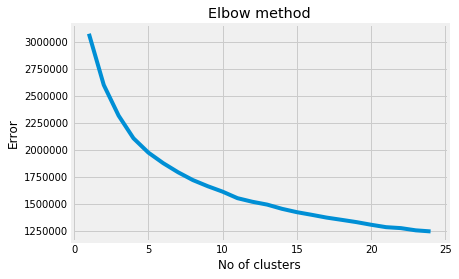

In [5]:
x = tmp_nation.drop(columns=['nationality', 'region'])
Error =[]
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 25), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)


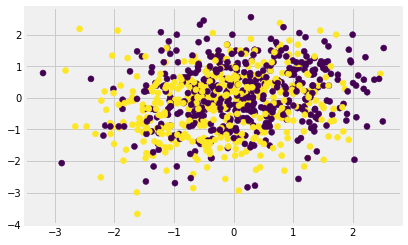

In [7]:
plt.scatter(x['diet health score'], x['lifestyle score'], c=y_kmeans)

In [8]:
accuracy_score(tmp_nation['nationality'], y_kmeans)

0.6132723112128147

In [12]:
confusion_matrix(tmp_nation['nationality'], y_kmeans)

array([[208,  90],
       [248, 328]])